In [81]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits import mplot3d

style.use("ggplot")

In [82]:
df = pd.read_csv('data/multiple-linear-regression-dataset.csv')

In [83]:
data = preprocessing.scale(df)

In [84]:
datax = np.concatenate((data[:, 0].reshape(-1, 1), data[:, 2].reshape(-1, 1)), axis = 1)
datay = data[:, 1]

In [89]:
def model(x, y, learning_rate, epochs):
    m = x.shape[1]
    n = x.shape[0]
    
    w = np.zeros((1, n))
    b = 0
    
    for i in range(1, epochs+1):
        h = np.dot(w, x) + b
        cost = (1/(2*m)) * np.sum((h - y) ** 2)
        print("cost at iteration", i, ":", cost)
        dw = (1/m) * np.sum(np.dot((h - y), x.T))
        db = (1/m) * np.sum(h - y)
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
    
    return w, b

In [110]:
def score(x, y, w, b):
    m = x.shape[1]
    
    h = np.dot(w, x) + b
    h_cost = (1/(2*m)) * np.sum((h - y) ** 2)
    total_cost = (1/(2*m)) * np.sum((np.mean(y) - y) ** 2)
    
    print("h_cost:", h_cost, "total_cost:", total_cost)
    
    return 1 - (h_cost/total_cost)

In [91]:
trainx, testx, trainy, testy = train_test_split(datax, datay, test_size = 0.2)

In [100]:
trainy = trainy.reshape(1, -1)
testy = testy.reshape(1, -1)
trainx = trainx.T
testx = testx.T

In [105]:
w, b = model(trainx, trainy, 0.1, 20)

cost at iteration 1 : 0.48205227400364203
cost at iteration 2 : 0.18544390422060075
cost at iteration 3 : 0.08159376179055369
cost at iteration 4 : 0.04519987501579829
cost at iteration 5 : 0.03241826261943714
cost at iteration 6 : 0.027906626139703957
cost at iteration 7 : 0.02629541592787179
cost at iteration 8 : 0.025704694268152528
cost at iteration 9 : 0.025475708857250107
cost at iteration 10 : 0.025377157851418964
cost at iteration 11 : 0.02532744061120714
cost at iteration 12 : 0.02529745168499975
cost at iteration 13 : 0.02527654925608559
cost at iteration 14 : 0.025260631184917514
cost at iteration 15 : 0.025247949162819305
cost at iteration 16 : 0.02523763274052424
cost at iteration 17 : 0.025229163488726003
cost at iteration 18 : 0.025222183232224988
cost at iteration 19 : 0.025216420522107753
cost at iteration 20 : 0.02521165959336191


In [111]:
print(score(testx, testy, w, b))

h_cost: 0.01806250723159375 total_cost: 0.0029575128440557795
-5.107330106071075


In [112]:
print(w, b)

[[0.47187332 0.47187332]] 0.04409846724322021


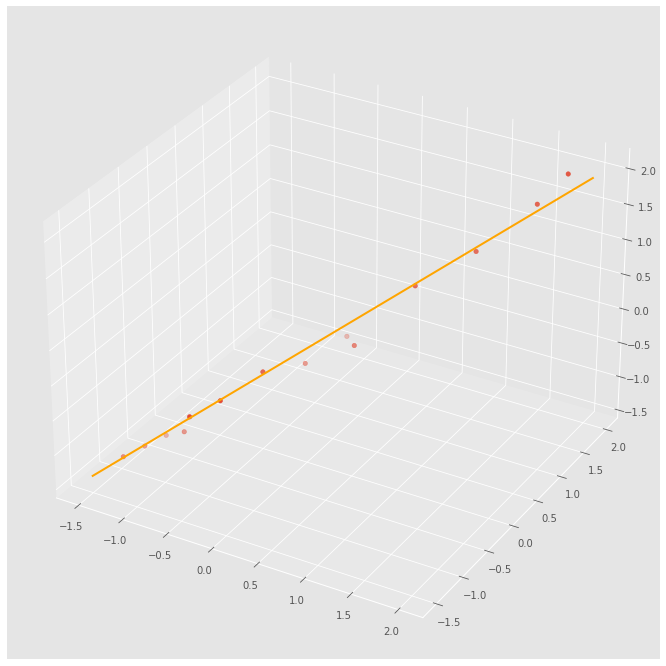

In [117]:
w1 = 0.47187332
w2 = 0.47187332
b = 0.04409846724322021
fig = plt.figure(figsize = (16, 12))
ax = plt.axes(projection = '3d')
ax.scatter3D(data[:, 0], data[:, 2], data[:, 1])
ax.plot3D([-1.5, 2], [-1.5, 2], [(w1 * -1.5) + (w2 * -1.5) + b, (w1 * 2) + (w2 * 2) + b], color = 'orange', linewidth = 2)
plt.show()